
<h1> Práctica 1 - APCC. </h1>

<h3>Entorno de trabajos, puertas cuánticas, superposición, entrelazamiento.</h3>



In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="", overwrite=True, set_as_default = True)

# Load saved credentials
service = QiskitRuntimeService()

Parte guiada: Código que genera números aleatorios qiskit.


Número de ocurrencias para 0 y 1: {'1': 494, '0': 506}


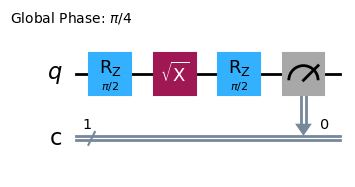

In [3]:
from qiskit import(QuantumCircuit, transpile)
from qiskit.visualization import plot_histogram

shots = 1000

# Usamos el qasm_simulator
backend = service.get_backend("ibmq_qasm_simulator")

# Creamos circuito con 1 qubit y 1 bit clasico 
qc = QuantumCircuit(1, 1)
 
# Hadamard al qubit 0
qc.h(0)

# Realizamos las mediciones
qc.measure([0],[0])

# Ejecutamos el circuito sobre el simulador qasm
qc = transpile(qc, backend)
job = backend.run(qc, shots=shots)

# Almacenamos los resultados
result = job.result()

# Capturamos las ocurrencias de salida
counts = result.get_counts(qc)
# Escribimos el número de ocurrencias 
print("\nNúmero de ocurrencias para 0 y 1:",counts)
 
# Dibujamos el circuito (debe ser la ultima linea)
qc.draw("mpl") # Sin mpl dibuja con texto

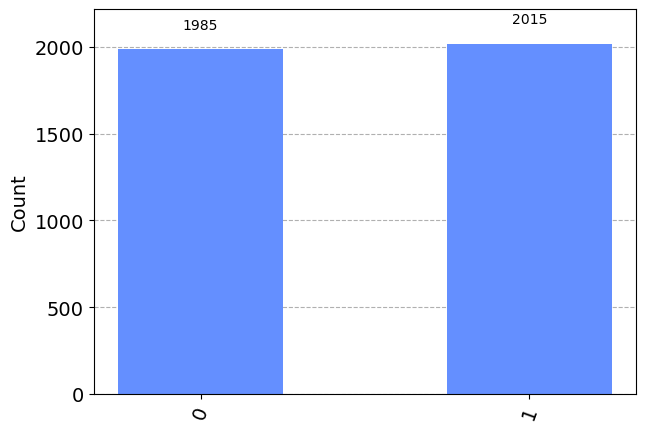

In [5]:
plot_histogram(counts) # Mostramos el histograma

**Ejercicio 1**. Programar el estado de Bell utilizando Qiskit. Ejecutar el comando Aer.backends() para observar los simuladores disponibles y emplear como backends al menos 3 de los simuladores disponibles en Qiskit Aer. ¿Qué similitudes y diferencias existen?.

Simuladores disponibles: 
<IBMBackend('simulator_mps')>
<IBMBackend('simulator_statevector')>
<IBMBackend('simulator_stabilizer')>
<IBMBackend('ibm_brisbane')>
<IBMBackend('ibm_kyoto')>
<IBMBackend('ibm_osaka')>
<IBMBackend('ibmq_qasm_simulator')>
<IBMBackend('simulator_extended_stabilizer')>
Representacion del circuito ---------------------


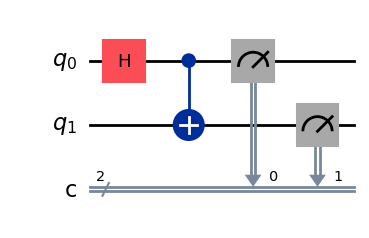

In [6]:
from qiskit_aer import AerSimulator
# Creamos el circuito para el estado de Bell
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

# Medimos los qubits
qc.measure([0,1], [0,1])

# Simuladores disponibles
service = QiskitRuntimeService()
simulators = service.backends()

print("Simuladores disponibles: ")
for simulator in simulators:
    print(simulator)

# Imprimimos circuito
print("\nRepresentacion del circuito ------------------------")
qc.draw("mpl")

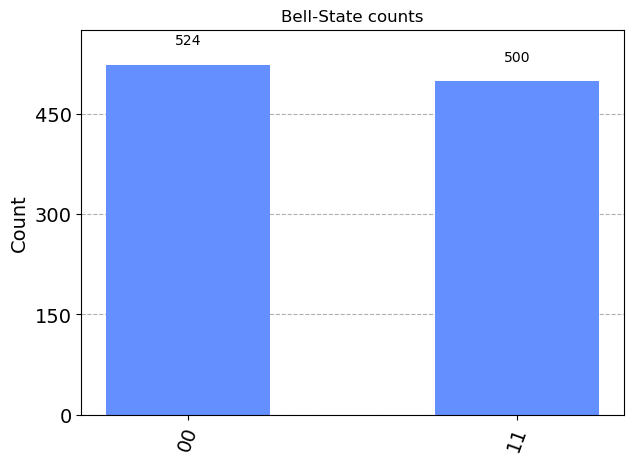

In [8]:
# Ejecutamos el circuito en simulacion ideal 
#         --> Backend no influye hasta simulación con ruido

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Bell-State counts')

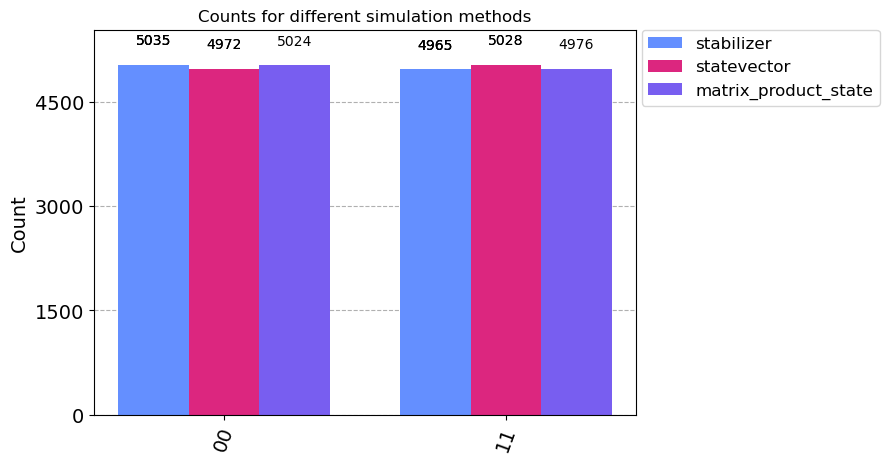

In [13]:
# Incrementamos los shots para reducir las diferencias en las muestras
shots = 10000

# Método de Simulación con Stabilizer
sim_stabilizer = service.get_backend('simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(qc, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Método de Simulación con Statevector
sim_statevector = service.get_backend('simulator_statevector')
job_statevector = sim_statevector.run(qc, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Método de Simulación con Matrix Product State
sim_mps = service.get_backend('simulator_mps')
job_mps = sim_mps.run(qc, shots=shots)
counts_mps = job_mps.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector, counts_mps],
               title='Counts for different simulation methods',
               legend=['stabilizer', 'statevector', 'matrix_product_state'])

Al realizar simulación ideal, cambiar el método entre cualquiera de los disponibles (stabilizer, statevector, mps) no debería afectar el resultado de las simulaciones, al margen de diferencias en la representación visual de los resultados, como puede apreciarse en la siguiente celda:

In [19]:
print(f"\nNúmero de ocurrencias para 0 y 1 en simulator_stabilizer:\n\t-->",counts_stabilizer)   
print("\n-----------------------------------------------\n")
print(f"Número de ocurrencias para 0 y 1 en simulator_statevector:\n\t-->",counts_statevector)   
print("\n-----------------------------------------------\n")
print(f"Número de ocurrencias para 0 y 1 en simulator_mps:\n\t-->",counts_mps)   


Número de ocurrencias para 0 y 1 en simulator_stabilizer:
	--> {'00': 5035, '11': 4965}

-----------------------------------------------

Número de ocurrencias para 0 y 1 en simulator_statevector:
	--> {'11': 5028, '00': 4972}

-----------------------------------------------

Número de ocurrencias para 0 y 1 en simulator_mps:
	--> {'00': 5024, '11': 4976}


De esta forma, además de que los resultados de la simulación sean consistentes entre sí, la API para interactuar con ellos es también similar. 

Por otro lado, aunque los simuladores ofrezcan resultados teóricos obtenibles de circuitos reales, cada simulador tiene un número diferente de qubits y, por tanto, una capacidad diferente de tamaño de circuitos (stabilizer tiene 5000; mps, 100; statevector, 32).


**Ejercicio 2**. Programar el estado GHZ comentado en la Sección 4.2 utilizando Qiskit. Simularlo con ruido y utilizando un computador cuántico real. Plotear los resultados y comentar las diferencias.

In [2]:
# Creamos el circuito para el estado de Bell
GHZ = QuantumCircuit(3)
GHZ.h(0)
GHZ.cx(0, 1)
GHZ.cx(1, 2)

# Medimos los qubits
GHZ.measure_all()

# Imprimimos circuito
GHZ.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

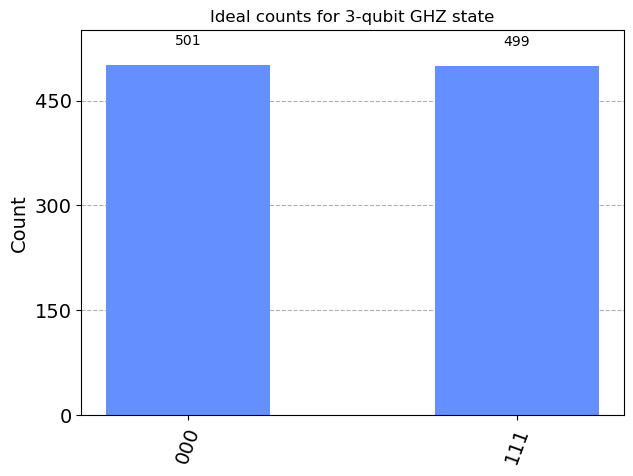

In [39]:
# Simulacion ideal
sim_ideal = AerSimulator()

# Ejecutamos y mostramos counts
result = sim_ideal.run(transpile(GHZ, sim_ideal), shots = 1000).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

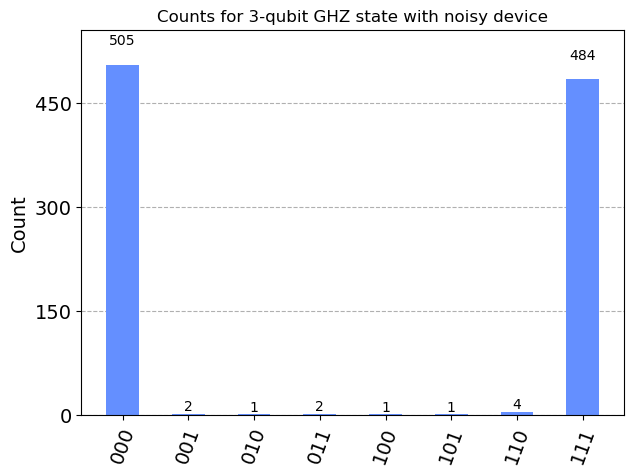

In [65]:
# Simulacion con ruido
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
 
# Generamos backend de simulación de 3-qubits
backend = GenericBackendV2(num_qubits=3)
 
# Transpilamos el circuito ideal en uno ejecutable por el backend
transpiled_circuit = transpile(GHZ, backend)
transpiled_circuit.draw('mpl')
 
# Ejecutamos el circuito transpilado 
job = backend.run(transpiled_circuit, shots = 1000)
counts = job.result().get_counts()
plot_histogram(counts, title="Counts for 3-qubit GHZ state with noisy device")

Como se puede observar, al realizar simulacion con ruido se generan salidas erróneas (valores entre 1 y 6) fruto de intentar replicar las características de un computador cuántico real, donde se producen: errores de medición, errores en las compuertas, decoherencia, ruido térmico, etc.

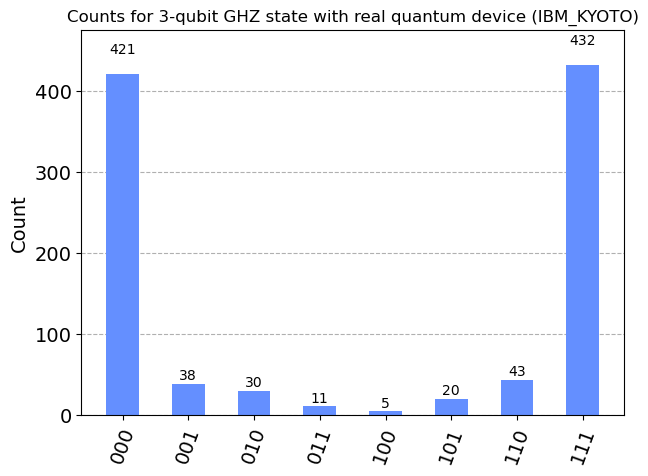

In [66]:
# Ejecución en un computador cuántico real
sim_kyoto = service.get_backend('ibm_kyoto')

# Transpile the circuit for the basis gates
tcirc = transpile(GHZ, sim_kyoto)

# Execute and get counts
result_noise = sim_kyoto.run(tcirc, shots = 1000).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with real quantum device (IBM_KYOTO)")

Al realizar una ejecución en un computador cuántico real observamos unos resultados similares a la simulación con ruido, aunque con una mayor tasa de error.

**Ejercicio 3**. Ejecutar el programa del Ejercicio 2 sobre distintos computadores reales de
IBM. Plotear los resultados y comentar las diferencias.

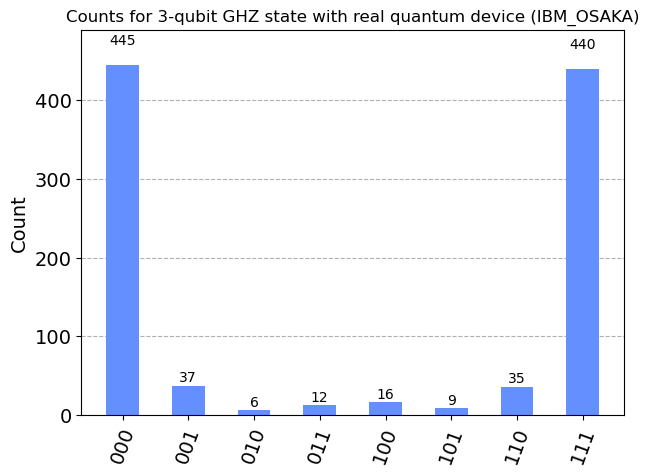

In [64]:
# Ejecución en un computador cuántico real
sim_osaka = service.get_backend('ibm_osaka')

# Transpile the circuit for the basis gates
tcirc = transpile(GHZ, sim_osaka)

# Execute and get counts
result_noise = sim_osaka.run(tcirc, shots = 1000).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with real quantum device (IBM_OSAKA)")

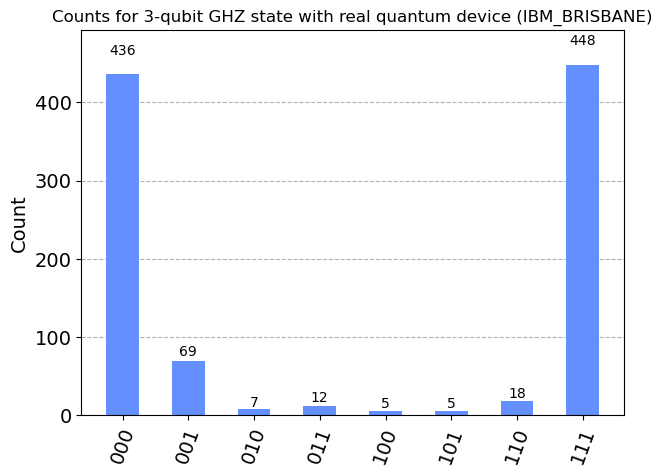

In [69]:
service = QiskitRuntimeService()

# Ejecución en un computador cuántico real
sim_brisbane = service.get_backend('ibm_brisbane')

# Transpile the circuit for the basis gates
tcirc = transpile(GHZ, sim_brisbane)

# Execute and get counts
result_noise = sim_brisbane.run(tcirc, shots = 1000).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with real quantum device (IBM_BRISBANE)")

En base a las ejecuciones en computadores cuánticos reales realizados, observamos:

- Tasa de errores similar, considerando shots = 1000. Presumiblemente haya diferencias mayores para ejecuciones más grandes, considerando las siguientes diferencias:
    - Kyoto. Median ECR error: 9.362e-3; Median SX error: 2.904e-4; Median readout error: 1.450e-2
    - Osaka. Median ECR error: 9.077e-3; Median SX error: 2.262e-4; Median readout error: 2.110e-2
    - Brisbane. Median ECR error: 7.290e-3; Median SX error: 2.425e-4; Median readout error: 1.400e-2

- Distribución similar de los errores, con más errores producidos para valores cercanos a los esperados (mayor cantidad de errores relativos en 001 y 110 que para el resto de valores). 

- Aunque los 3 computadores cuánticos disponibles tengan el mismo número de qubits y distribución de layout, los "readout assigment error" para los qubits varía de unos a otros. Dada la simplicidad del circuito no se aprecian diferencias en el rendimiento, con tiempos de ejecución de 2s en los tres dispositivos.

- Cuando se realizaron las ejecuciones, kyoto se mantuvo más tiempo en cola (2 horas), seguido de brisbane (25 minutos) y osaka (7 minutos). Estos tiempos dependen de la cantidad de trabajos en cola para cada computador cuántico.

**Ejercicio 4**. Ejecutar el programa del Ejercicio 2 sobre distintos simuladores y computadores reales de IonQ y Quantinuum. Plotear los resultados y comentar las diferencias.

In [1]:
from azure.quantum import Workspace
from azure.identity import DefaultAzureCredential
from azure.quantum.qiskit import AzureQuantumProvider

credential = DefaultAzureCredential(exclude_interactive_browser_credential=False,
                                    interactive_browser_tenant_id="2b079dc7-e2ea-45bc-9182-0fde14b549b1")

# Copy the settings for your workspace below
workspace = Workspace(
    resource_id = "/subscriptions/a873c69e-73e2-4b44-963c-67e36cc64a1f/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/ArquitecturaComputadoresCuanticos", 
    location = "uksouth",
    credential=credential
)

from qiskit import QuantumCircuit
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

# Listado de targets disponibles
provider = AzureQuantumProvider(workspace)

provider.backends()

/var/folders/9t/vlvnxw357gg70m34h7hgr5wm0000gn/T/ipykernel_3259/2169535719.py:16: DeprecationWarning: qiskit.tools.monitor is deprecated and will be removed in Qiskit 1.0.0
  from qiskit.tools.monitor import job_monitor


[<IonQSimulatorQirBackend('ionq.simulator')>,
 <IonQSimulatorBackend('ionq.simulator')>,
 <IonQSimulatorNativeBackend('ionq.simulator')>,
 <IonQQPUQirBackend('ionq.qpu')>,
 <IonQQPUBackend('ionq.qpu')>,
 <IonQQPUNativeBackend('ionq.qpu')>,
 <IonQAriaQirBackend('ionq.qpu.aria-1')>,
 <IonQAriaBackend('ionq.qpu.aria-1')>,
 <IonQAriaNativeBackend('ionq.qpu.aria-1')>,
 <IonQAriaQirBackend('ionq.qpu.aria-2')>,
 <IonQAriaBackend('ionq.qpu.aria-2')>,
 <IonQAriaNativeBackend('ionq.qpu.aria-2')>,
 <QuantinuumSyntaxCheckerQirBackend('quantinuum.sim.h1-1sc')>,
 <QuantinuumSyntaxCheckerBackend('quantinuum.sim.h1-1sc')>,
 <QuantinuumSyntaxCheckerQirBackend('quantinuum.sim.h1-2sc')>,
 <QuantinuumSyntaxCheckerBackend('quantinuum.sim.h1-2sc')>,
 <QuantinuumEmulatorQirBackend('quantinuum.sim.h1-1e')>,
 <QuantinuumEmulatorBackend('quantinuum.sim.h1-1e')>,
 <QuantinuumEmulatorQirBackend('quantinuum.sim.h1-2e')>,
 <QuantinuumEmulatorBackend('quantinuum.sim.h1-2e')>,
 <QuantinuumQPUQirBackend('quantinuum.qp

In [8]:
GHZ.draw() # Mostramos el circuito que vamos a ejecutar

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

Para IonQ, emplearemos ionq.simulator y ionq.qpu.aria-1.
Para Quantinuum, utilizaremos quantinuum.sim.h1-1sc, quantinuum.sim.h1-1e y quantinuum.qpu.h1-1

Estimated cost: 0.0 USD
Job id: d9caa120-dc68-11ee-a524-acde48001122
Job Status: job has successfully run


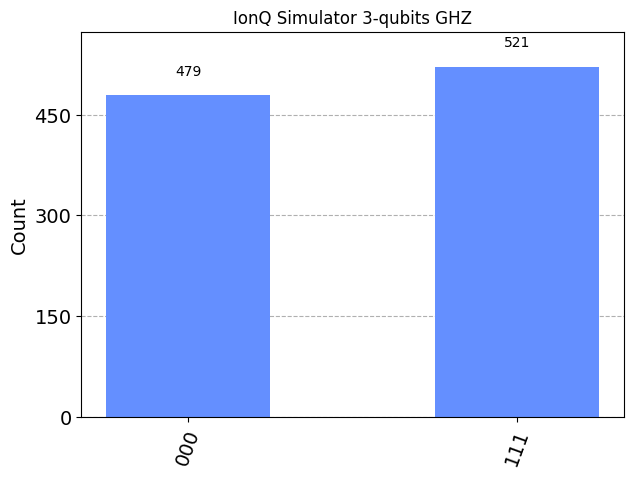

In [3]:
# Simulacion en IonQ

ionq_simulator_backend = provider.get_backend("ionq.simulator")

# En primer lugar, realizamos una estimacion
cost = ionq_simulator_backend.estimate_cost(GHZ, shots=1000)
print(f"Estimated cost: {cost.estimated_total} {cost.currency_code}")

# Ejecutamos 
job = ionq_simulator_backend.run(GHZ, shots=1000)
print("Job id:", job.id())

# Obtenemos los resultados 
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(GHZ), title="IonQ Simulator 3-qubits GHZ")

In [ ]:
# Ejecución real en IonQ

ionq_qpu_backend = provider.get_backend("ionq.qpu.aria-1") 

# En primer lugar, realizamos una estimacion
cost = ionq_qpu_backend.estimate_cost(GHZ, shots=1000)
print(f"Estimated cost: {cost.estimated_total} {cost.currency_code}")

# Ejecutamos 
job = ionq_qpu_backend.run(GHZ, shots=1000)
print("Job id:", job.id())

# Obtenemos los resultados 
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(GHZ), title="IonQ QPU 3-qubits GHZ")

Al haberse agotado los créditos para el uso de IonQ, result_status y exp_status reciben valor None y la función get_counts() envía el siguiente mensaje de error: TypeError: sequence item 0: expected str instance, NoneType found. No podemos ejecutar hasta obtener más créditos.

**Nota**. El output de la ejecución anterior se perdió debido a la pérdida de sesión con Azure (por no haber guardado las credenciales empleando Azure Cli, error que se evitó en la ejecución de Quantinuum).

Estimated cost: 0.0 HQC
Job id: f36ac358-dc68-11ee-a524-acde48001122
Job Status: job has successfully run


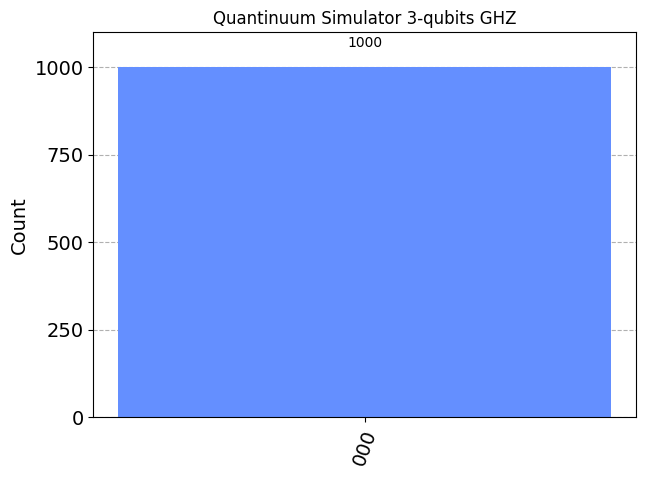

In [4]:
# Simulacion en Quantinuum

quantinuum_simulator_backend = provider.get_backend("quantinuum.sim.h1-1sc")

# En primer lugar, realizamos una estimacion
cost = quantinuum_simulator_backend.estimate_cost(GHZ, shots=1000)
print(f"Estimated cost: {cost.estimated_total} {cost.currency_code}")

# Ejecutamos 
job = quantinuum_simulator_backend.run(GHZ, shots=1000)
print("Job id:", job.id())

# Obtenemos los resultados 
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(GHZ), title="Quantinuum Simulator 3-qubits GHZ")

Este resultado nos indica que el resultado de todas las ejecuciones fue el esperado.

Estimated cost: 14.2 EHQC
Job id: 11efef4c-dc69-11ee-a524-acde48001122
Job Status: job has successfully run


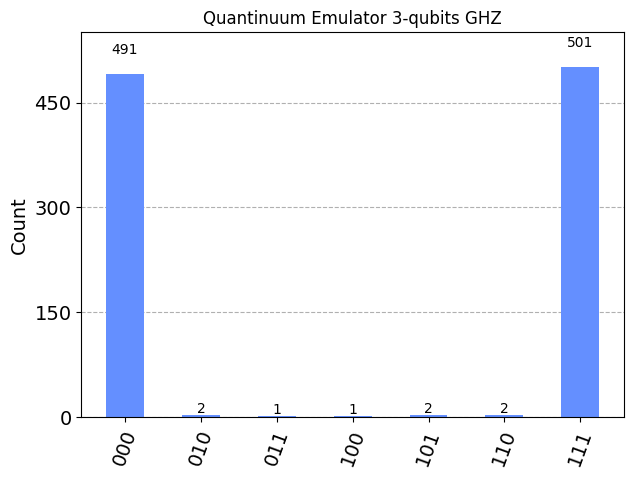

In [5]:
# Emulacion en Quantinuum

quantinuum_emulator_backend = provider.get_backend("quantinuum.sim.h1-1e")

# En primer lugar, realizamos una estimacion
cost = quantinuum_emulator_backend.estimate_cost(GHZ, shots=1000)
print(f"Estimated cost: {cost.estimated_total} {cost.currency_code}")

# Ejecutamos 
job = quantinuum_emulator_backend.run(GHZ, shots=1000)
print("Job id:", job.id())

# Obtenemos los resultados 
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(GHZ), title="Quantinuum Emulator 3-qubits GHZ")

Estimated cost: 14.2 HQC
Job id: c0c66a0a-dc69-11ee-a524-acde48001122
Job Status: job has successfully run


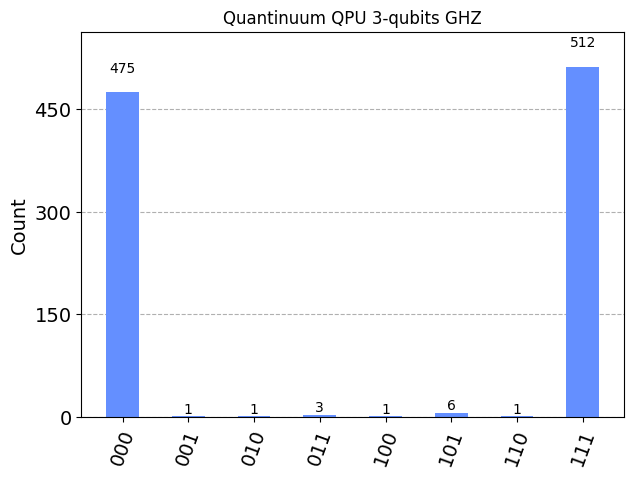

In [9]:
# Ejecución real en Quantinuum

quantinuum_qpu_backend = provider.get_backend("quantinuum.qpu.h1-1")

# En primer lugar, realizamos una estimacion
cost = quantinuum_qpu_backend.estimate_cost(GHZ, shots=1000)
print(f"Estimated cost: {cost.estimated_total} {cost.currency_code}")

# Ejecutamos 
job = quantinuum_qpu_backend.run(GHZ, shots=1000)
print("Job id:", job.id())

# Obtenemos los resultados 
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(GHZ), title="Quantinuum QPU 3-qubits GHZ")